In [38]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as pyplot
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import seaborn as sb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [23]:
drive.mount('/content/drive')
workfolder = '/content/drive/MyDrive'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


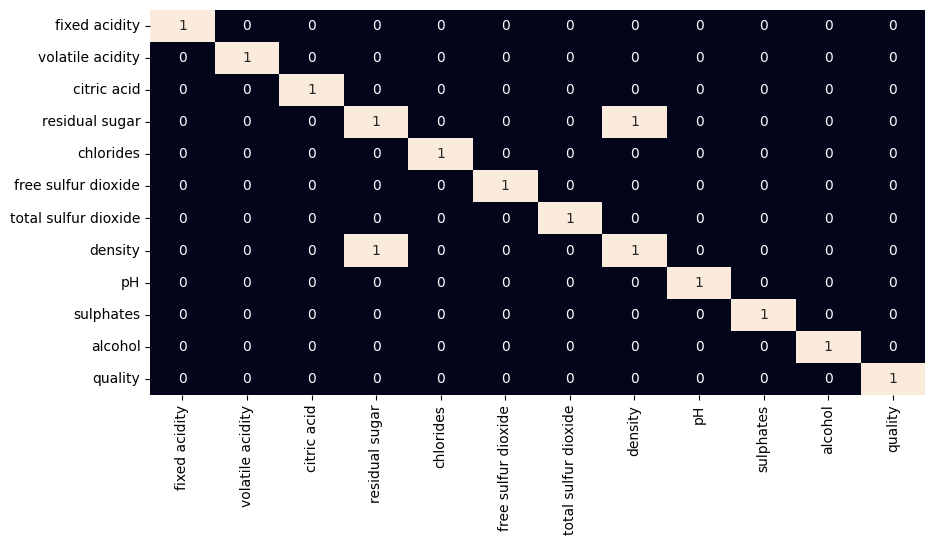

In [31]:
dataframe = pd.read_csv(f"{workfolder}/MachineLearning/WineQuality/winequality-white.csv", delimiter=";")

pyplot.figure(figsize=(10, 5))
sb.heatmap(dataframe.corr() > 0.7, annot=True, cbar=False)
pyplot.show()

In [32]:
dataframe.drop('residual sugar', axis=1, inplace = True)

In [35]:
features = dataframe.drop(['quality'], axis=1)
target = dataframe['quality']

In [46]:
reg = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.2, random_state=42)

reg.fit(xtrain, ytrain)
print("MAE e MSE para treino:")
print(mean_absolute_error(ytrain, reg.predict(xtrain)))
print(mean_squared_error(ytrain, reg.predict(xtrain)))

print("\nMAE e MSE para teste:")
print(mean_absolute_error(ytest, reg.predict(xtest)))
print(mean_squared_error(ytest, reg.predict(xtest)))

MAE e MSE para treino:
0.5871219715870666
0.5746032922325099

MAE e MSE para teste:
0.5989288997199728
0.5932284132103312


Pro conjunto de testes houve uma ligeira melhora influenciada pela quantidade de dados presente no conjunto de treino.